9. Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.

10. Train an SVM classifier on the wine dataset, which you can load using sklearn.datasets.load_wine(). This dataset contains the chemical analyses of 178 wine samples produced by 3 different cultivators: the goal is to train a classification model capable of predicting the cultivator based on the wine’s chemical analysis. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all three classes. What accuracy can you reach?

11. Train and fine-tune an SVM regressor on the California housing dataset. You can use the original dataset rather than the tweaked version we used in Chapter 2, which you can load using sklearn.datasets.fetch_california_housing(). The targets represent hundreds of thousands of dollars. Since there are over 20,000 instances, SVMs can be slow, so for hyperparameter tuning you should use far fewer instances (e.g., 2,000) to test many more hyperparameter combina‐ tions. What is your best model’s RMSE?

In [ ]:
# 9

[[0.61571106 0.81021718]] [-2.12826314]
 
[[1.1 0.7]] [-3.27999997]
 
[[0.57087705 0.84161287]] [-2.0950736]


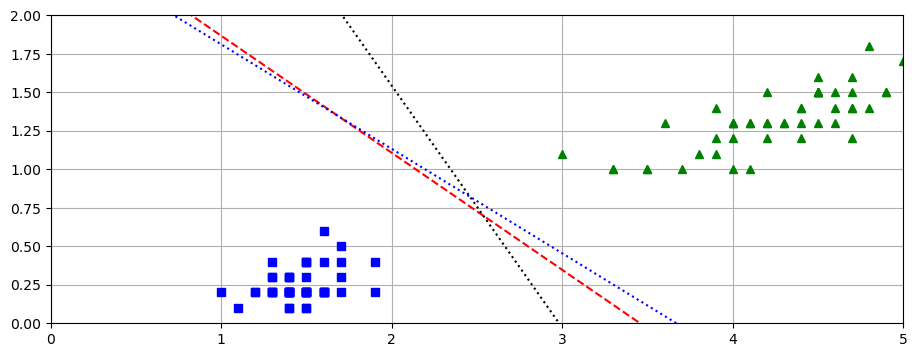

In [113]:
import numpy as np
from sklearn.svm import LinearSVC,LinearSVR,SVC,SVR
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

iris = load_iris(as_frame=True)
Xi= iris.data[['petal length (cm)','petal width (cm)']].values
y= iris.target[(iris.target==0)|(iris.target==1)]
X = Xi[(iris.target==0)|(iris.target==1)]
standard = StandardScaler()
Xx = standard.fit_transform(X)

from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline

linsvc = LinearSVC(C=1,random_state=42)
linsvc.fit(X,y)

kersvc = SVC(kernel='linear',C=1,random_state=42)
kersvc.fit(X,y)

sgdreg = SGDClassifier(penalty='l2',learning_rate='adaptive',random_state=42,alpha=0.01,eta0=0.001)
sgdreg.fit(X,y)

print(linsvc.coef_,linsvc.intercept_)
print(" ")
print(kersvc.coef_,kersvc.intercept_)
print(" ")
print(sgdreg.coef_,sgdreg.intercept_)

def simlar_svc(svc,linetype):
    w = svc.coef_[0]
    b = svc.intercept_
    x0 = np.linspace(0,5,200)
    
    decision_boundary = (-w[0]*x0 - b)/w[1]

    
    plt.plot(x0,decision_boundary,linetype)
    
    
fig= plt.figure(figsize=(11,4)) 
plt.plot(X[y==0,0],X[y==0,1],'bs')
plt.plot(X[y==1,0],X[y==1,1],'g^')

simlar_svc(linsvc,'r--')

simlar_svc(kersvc,'k:')

simlar_svc(sgdreg,'b:')

plt.axis([0,5,0,2])
plt.grid(True)
plt.show()

In [ ]:
# 10

In [35]:
from sklearn.datasets import load_wine
wine = load_wine(as_frame=True)
X,y = wine.data,wine.target


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [37]:
from sklearn.multiclass import OneVsRestClassifier
# from sklearn.model_selection import learning_curve


In [42]:
from sklearn.pipeline import Pipeline,make_pipeline
svm = Pipeline([('scaler',StandardScaler()),('svc',OneVsRestClassifier(SVC(C=10,random_state=42,max_iter=1000000)))])
svm.fit(X_train,y_train)

svc = Pipeline([('scaler',StandardScaler()),('svc',SVC(C=10,random_state=42,max_iter=1000000))])
svc.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=10, max_iter=1000000, random_state=42))])

In [43]:
cross_val_score(svm, X_train, y_train, cv=5, scoring="accuracy").mean()

0.9698005698005698

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon,randint,uniform,loguniform
# params_distr = [{'svc__estimator__C':uniform(1,10),
#                'svc__estimator__gamma':['scale','auto'],
#                'svc__estimator__kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']},
#                {'svc__estimator__C':uniform(1,10),
#                'svc__estimator__gamma':loguniform(0.001, 0.1),
#                'svc__estimator__kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']}]

params_distrib = {
    "svc__estimator__gamma": loguniform(0.001, 0.1),
    "svc__estimator__C": uniform(1, 10)}
    
rnd_search = RandomizedSearchCV(svm,param_distributions=params_distr,n_iter=100,cv=5,random_state=42)
rnd_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('svc',
                                              OneVsRestClassifier(estimator=SVC(C=10,
                                                                                max_iter=1000000,
                                                                                random_state=42)))]),
                   n_iter=100,
                   param_distributions=[{'svc__estimator__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f980e909460>,
                                         'svc__estimator__gamma': ['scale',
                                                                   'auto'],
                                         'svc__estimator__kernel': ['linear',
                                                                    'poly',
                                                                    'rbf',
                                                                    'sigmoid',
                                                                    'precomputed']},
                                        {'svc__estimator__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f980e9096d0>,
                                         'svc__estimator__gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f980e9099a0>,
                                         'svc__estimator__kernel': ['linear',
                                                                    'poly',
                                                                    'rbf',
                                                                    'sigmoid',
                                                                    'precomputed']}],
                   random_state=42)

In [50]:
rnd_search.best_score_,rnd_search.best_params_

(0.9923076923076923,
 {'svc__estimator__C': 9.870864242651173,
  'svc__estimator__gamma': 0.036287002255540664,
  'svc__estimator__kernel': 'sigmoid'})

In [51]:
rnd_search.score(X_test,y_test)

0.9777777777777777

In [ ]:
# 11

In [52]:
from sklearn.datasets import fetch_california_housing


In [53]:
cali = fetch_california_housing()
X,y = cali.data,cali.target

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
from sklearn.svm import SVR
housing = Pipeline([('scaler',StandardScaler()),('svr',SVR())])
housing.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR())])

In [56]:
from sklearn.model_selection import cross_val_predict
-cross_val_score(housing,X_train[:2000],y_train[:2000],scoring='neg_root_mean_squared_error',cv=3)

array([0.57468056, 0.58080946, 0.57191242])

In [57]:
from sklearn.metrics import mean_squared_error
mean_squared_error(housing.predict(X_train),y_train,squared=False)

0.5797673265358964

In [58]:
from scipy.stats import expon,randint,uniform,loguniform,randint

In [59]:
from scipy.stats import expon,randint,uniform,loguniform,randint
params_distrib = {
    "svr__gamma": loguniform(0.001, 0.1),
    "svr__C": uniform(1, 10)}
    
rnd_search = RandomizedSearchCV(housing,param_distributions=params_distrib,n_iter=100,cv=3,
                                random_state=42)
rnd_search.fit(X_train[:2000],y_train[:2000])
rnd_search.best_score_
rnd_search.best_params_

{'svr__C': 4.63629602379294, 'svr__gamma': 0.08781408196485974}

In [60]:
-cross_val_score(rnd_search.best_estimator_,X_train,y_train,scoring='neg_root_mean_squared_error',cv=5)

array([0.58835648, 0.57468589, 0.58085278, 0.57109886, 0.59853029])

In [61]:
mean_squared_error(rnd_search.best_estimator_.predict(X_test),y_test,squared=False)

0.5854732265172222